# CSE 469 Project
Team Member 1: Jyothismaria Joseph (jyothism@buffalo.edu)
Team Member 2: Ibrahim Allahbuksh (iallahbu@buffalo.edu)
Team Member 3: Cailey Shum (caileysh@buffalo.edu)

### Project Contributions
Jyothismaria: Pre-processed datasets, implemented data mining experiments, and found "Password Strength Classifier Dataset".
Ibrahim: Implemented data mining algorithm.
Cailey: Found "Bad Passwords (Never Use them)" dataset, calculated datasets statistics and plotted datasets graphs, formatted and added explainations to project report, and wrote the project presentation.

## Introduction
### Problem: 
   Using classification to determine how strong a bad password is based on time it takes to crack online and offline. 

### Impact: 
   To determine the strongest passwords within the dataset and associate which ones are the best and worst.

## Formulation
Input: A dataset that uses the following features for classification: 
* Password Length
* Count of Characters in Password
* Count of Numbers in Password
* Count of Special Characters in Password 
* Character Length in Password

Expected Output: A decision tree that returns whether or not the password is weak, medium, or strong in password strength.

## Datasets
Datasets provided by Kaggle.com
* "Bad Passwords (Never Use them)":
    * https://www.kaggle.com/datasets/sujaykapadnis/bad-passwords-never-use-them
* "Password Strength Classifier Dataset":
    * https://www.kaggle.com/datasets/bhavikbb/password-strength-classifier-dataset/data  

## Data Pre-Processing

* For pre-processing, both dataset categories were turned into features and any missing values were dropped.
* When we first started the project, we intended on using all features in the Kaggle dataset. 
    * In the "Bad Passwords (Never Use them)" dataset, we wanted to use the feature of online and offline cracking time.
         * Therefore, all time units needed to be standardized into minutes.
* However, we then decided to merge a different data from Kaggle "Password Strength Classifier Dataset" and subset the dataset to get the following features:
    * Password Length
    * Count of Characters in Password
    * Count of Numbers in Password
    * Count of Special Characters in Password 
    * Character Length in Password

In [84]:
#Importing libraries 
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from collections import Counter

In [85]:
df_pswd = pd.read_csv("passwords.csv")

In [86]:
#Cleaning
#Removing missing values
#Removing wrong entries in strength
df_pswd.isna().sum()

rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64

In [87]:
#dropping the rows that have missing value
rows = list(df_pswd[df_pswd["strength"].isna()].index)
df_pswd = df_pswd.drop(rows)

In [88]:
#strength supposed to be from 1 to 10 any values other than that need to be removed
df_pswd["strength"].describe()

count    500.000000
mean       7.432000
std        5.415536
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       48.000000
Name: strength, dtype: float64

In [89]:
rows = list(df_pswd[df_pswd["strength"] > 10].index)
df_pswd = df_pswd.drop(rows)

In [90]:
# categorizing strength into 3 categories 
# 0 -> weak
# 1 -> medium
# 2 -> strong
strength_bin = []
strength = list(df_pswd["strength"])
for x in strength:
    if(x >= 0 and x <= 3):
        strength_bin.append(0)
    elif(x >= 4 and x <= 7):
        strength_bin.append(1)
    elif(x >= 8 and x <= 10):
        strength_bin.append(2)
df_pswd["strength_bin"] = strength_bin
df_pswd

rank  password             category  value time_unit  offline_crack_sec  \
0      1.0  password     password-related   6.91     years       2.170000e+00   
1      2.0    123456  simple-alphanumeric  18.52   minutes       1.110000e-05   
2      3.0  12345678  simple-alphanumeric   1.29      days       1.110000e-03   
3      4.0      1234  simple-alphanumeric  11.11   seconds       1.110000e-07   
4      5.0    qwerty  simple-alphanumeric   3.72      days       3.210000e-03   
..     ...       ...                  ...    ...       ...                ...   
494  495.0    hotrod           cool-macho   3.72      days       3.210000e-03   
495  496.0    reddog           cool-macho   3.72      days       3.210000e-03   
496  497.0  alexande                 name   6.91     years       2.170000e+00   
497  498.0   college            nerdy-pop   3.19    months       8.350000e-02   
498  499.0    jester                 name   3.72      days       3.210000e-03   

     rank_alt  strength  font_size  strength_bin  
0         1.0       8.0       11.0             2  
1         2.0       4.0        8.0             1  
2         3.0       4.0        8.0             1  
3         4.0       4.0        8.0             1  
4         5.0       8.0       11.0             2  
..        ...       ...        ...           ...  
494     497.0       7.0       11.0             1  
495     498.0       6.0       10.0             1  
496     499.0       9.0       12.0             2  
497     500.0       7.0       11.0             1  
498     501.0       7.0       11.0             1  

[485 rows x 10 columns]

In [91]:
df_pswd["time_unit"].unique()

array(['years', 'minutes', 'days', 'seconds', 'months', 'hours', 'weeks'],
      dtype=object)

In [92]:
#standardizing the time units for value to mins

#using standard values for time:
    # 1 year = 525600 mins
    # 1 day = 1440 min
    # 1 month = 43800
    # 1 week = 10080
    # 1 sec = 1/60 min
    
online_attack = []
offline_attack = []
df_online = list(df_pswd["value"])
df_offline = list(df_pswd["offline_crack_sec"])
df_time = list(df_pswd["time_unit"])
for i in range(0, len(df_time)):
    if(df_time[i] == 'years'):
        online_attack.append(df_online[i]* 525600)
    elif(df_time[i] == 'days'):
        online_attack.append(df_online[i]* 1440)
    elif(df_time[i] == 'months'):
        online_attack.append(df_online[i]* 43800)
    elif(df_time[i] == 'hours'):
        online_attack.append(df_online[i]* 60)
    elif(df_time[i] == 'weeks'):
        online_attack.append(df_online[i]* 10080)
    elif(df_time[i] == 'seconds'):
        online_attack.append(df_online[i]*(1/60))
    elif(df_time[i] == 'minutes'):
        online_attack.append(df_online[i])
    offline_attack.append(df_offline[i]/60)
df_pswd["online_crack_min"] = online_attack
df_pswd["offline_crack_min"] = offline_attack

In [93]:
is_alpha = []
is_numeric = []
is_speacial = [] 
for i in df_pswd["password"]:
    char_dict = {}
    is_special_tal = 0
    is_numeric_tal = 0
    is_alpha_tal = 0
    for j in i:
        if j.isdigit() == True:
            is_numeric_tal = is_numeric_tal +1   
        else:
            if j.isalpha() == True:
                is_alpha_tal = is_alpha_tal +1
            else:
                is_special_tal = is_special_tal +1
                print(j)
    is_alpha.append(is_alpha_tal)
    is_numeric.append(is_numeric_tal)
    is_speacial.append(is_special_tal)
df_pswd["no_of_numeric"] = is_numeric
df_pswd["no_of_special_c"] = is_speacial
df_pswd["no_of_char"] = is_alpha
df_pswd

rank  password             category  value time_unit  offline_crack_sec  \
0      1.0  password     password-related   6.91     years       2.170000e+00   
1      2.0    123456  simple-alphanumeric  18.52   minutes       1.110000e-05   
2      3.0  12345678  simple-alphanumeric   1.29      days       1.110000e-03   
3      4.0      1234  simple-alphanumeric  11.11   seconds       1.110000e-07   
4      5.0    qwerty  simple-alphanumeric   3.72      days       3.210000e-03   
..     ...       ...                  ...    ...       ...                ...   
494  495.0    hotrod           cool-macho   3.72      days       3.210000e-03   
495  496.0    reddog           cool-macho   3.72      days       3.210000e-03   
496  497.0  alexande                 name   6.91     years       2.170000e+00   
497  498.0   college            nerdy-pop   3.19    months       8.350000e-02   
498  499.0    jester                 name   3.72      days       3.210000e-03   

     rank_alt  strength  font_size  strength_bin  online_crack_min  \
0         1.0       8.0       11.0             2      3.631896e+06   
1         2.0       4.0        8.0             1      1.852000e+01   
2         3.0       4.0        8.0             1      1.857600e+03   
3         4.0       4.0        8.0             1      1.851667e-01   
4         5.0       8.0       11.0             2      5.356800e+03   
..        ...       ...        ...           ...               ...   
494     497.0       7.0       11.0             1      5.356800e+03   
495     498.0       6.0       10.0             1      5.356800e+03   
496     499.0       9.0       12.0             2      3.631896e+06   
497     500.0       7.0       11.0             1      1.397220e+05   
498     501.0       7.0       11.0             1      5.356800e+03   

     offline_crack_min  no_of_numeric  no_of_special_c  no_of_char  
0         3.616667e-02              0                0           8  
1         1.850000e-07              6                0           0  
2         1.850000e-05              8                0           0  
3         1.850000e-09              4                0           0  
4         5.350000e-05              0                0           6  
..                 ...            ...              ...         ...  
494       5.350000e-05              0                0           6  
495       5.350000e-05              0                0           6  
496       3.616667e-02              0                0           8  
497       1.391667e-03              0                0           7  
498       5.350000e-05              0                0           6  

[485 rows x 15 columns]

In [94]:
#creating a new feature based on password column
password_length = []
for i in list(df_pswd["password"]):
    password_length.append(len(i))
df_pswd["password_length"] = password_length

In [95]:
bad_pass_features = df_pswd.drop(columns= ['value','rank', 'offline_crack_sec', 'rank_alt', 'strength', 'strength_bin','time_unit'], axis =1)
bad_pass_label = df_pswd["strength_bin"]

In [96]:
bad_pass_features

password             category  font_size  online_crack_min  \
0    password     password-related       11.0      3.631896e+06   
1      123456  simple-alphanumeric        8.0      1.852000e+01   
2    12345678  simple-alphanumeric        8.0      1.857600e+03   
3        1234  simple-alphanumeric        8.0      1.851667e-01   
4      qwerty  simple-alphanumeric       11.0      5.356800e+03   
..        ...                  ...        ...               ...   
494    hotrod           cool-macho       11.0      5.356800e+03   
495    reddog           cool-macho       10.0      5.356800e+03   
496  alexande                 name       12.0      3.631896e+06   
497   college            nerdy-pop       11.0      1.397220e+05   
498    jester                 name       11.0      5.356800e+03   

     offline_crack_min  no_of_numeric  no_of_special_c  no_of_char  \
0         3.616667e-02              0                0           8   
1         1.850000e-07              6                0           0   
2         1.850000e-05              8                0           0   
3         1.850000e-09              4                0           0   
4         5.350000e-05              0                0           6   
..                 ...            ...              ...         ...   
494       5.350000e-05              0                0           6   
495       5.350000e-05              0                0           6   
496       3.616667e-02              0                0           8   
497       1.391667e-03              0                0           7   
498       5.350000e-05              0                0           6   

     password_length  
0                  8  
1                  6  
2                  8  
3                  4  
4                  6  
..               ...  
494                6  
495                6  
496                8  
497                7  
498                6  

[485 rows x 9 columns]

In [97]:
bad_pass_label

0      2
1      1
2      1
3      1
4      2
      ..
494    1
495    1
496    2
497    1
498    1
Name: strength_bin, Length: 485, dtype: int64

In [98]:
df_category = bad_pass_features["category"]
def list_category(category):  
    type = [] 
    for i in df_category:
        if(i == category):
            type.append(1)
        else:
            type.append(0)
    return type
password_related = list_category("password-related")
bad_pass_features["password-related"] = password_related
simple_alphamuric = list_category("simple-alphanumeric")
bad_pass_features["simple_alphamuric"] = simple_alphamuric
animal = list_category("animal")
bad_pass_features["animal"] = animal
sport =  list_category("sport")
bad_pass_features["sport"] = sport
cool_macho =  list_category("cool-macho")
bad_pass_features["cool_macho"] = cool_macho
name =  list_category("name")
bad_pass_features["name"] = name
fluffy = list_category("fluffy")
bad_pass_features["fluffy"] = fluffy
food =  list_category("food")
bad_pass_features["food"] = food
nerdy_pop =  list_category("nerdy-pop")
bad_pass_features["nerdy_pop"] =  nerdy_pop
rebellious_rude = list_category("rebellious-rude")
bad_pass_features["rebellious_rude"] = rebellious_rude

In [99]:
#Merging "Password Strength Classifier" Dataset with "Bad Passwords (Never Use them)" Dataset

In [100]:
df_pswd_2 = pd.read_csv("passwords_second.csv")

In [101]:
is_alpha = []
is_numeric = []
is_speacial = [] 
for i in df_pswd_2["password"]:
    char_dict = {}
    is_special_tal = 0
    is_numeric_tal = 0
    is_alpha_tal = 0
    for j in i:
        if j.isdigit() == True:
            is_numeric_tal = is_numeric_tal +1   
        else:
            if j.isalpha() == True:
                is_alpha_tal = is_alpha_tal +1
            else:
                is_special_tal = is_special_tal +1
    is_alpha.append(is_alpha_tal)
    is_numeric.append(is_numeric_tal)
    is_speacial.append(is_special_tal)
df_pswd_2["no_of_numeric"] = is_numeric
df_pswd_2["no_of_special_c"] = is_speacial
df_pswd_2["no_of_char"] = is_alpha
df_pswd_2

password  strength  no_of_numeric  no_of_special_c  no_of_char
0            yrtzuab476         1              3                0           7
1      yEdnN9jc1NgzkkBP         2              2                0          14
2              sarita99         1              2                0           6
3        Suramerica2015         2              4                0          10
4      PPRbMvDIxMQ19TMo         2              2                0          14
...                 ...       ...            ...              ...         ...
99995         aulona044         1              3                0           6
99996       5201314ding         1              7                0           4
99997        isaac19725         1              5                0           5
99998            toji25         0              2                0           4
99999       midnight000         1              3                0           8

[100000 rows x 5 columns]

In [102]:
password_length = []
for i in list(df_pswd_2["password"]):
    password_length.append(len(i))
df_pswd_2["password_length"] = password_length

In [103]:
df_pswd_2["strength_bin"] = df_pswd_2["strength"]

In [104]:
df_pswd_2 = df_pswd_2.drop(columns= [ "strength"], axis= 1)

In [105]:
df_pswd_1 = bad_pass_features[["password", "no_of_numeric", "no_of_special_c", "no_of_char", "password_length"]]
df_pswd_1["strength_bin"] = bad_pass_label

/var/folders/jc/sg3z6y2956g1hgbnk66lw_680000gn/T/ipykernel_70457/3268181770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pswd_1["strength_bin"] = bad_pass_label


In [106]:
df_pswd_merged = [df_pswd_1, df_pswd_2]
df_pswd_merged = pd.concat(df_pswd_merged)

In [107]:
df_pswd_merged

password  no_of_numeric  no_of_special_c  no_of_char  \
0         password              0                0           8   
1           123456              6                0           0   
2         12345678              8                0           0   
3             1234              4                0           0   
4           qwerty              0                0           6   
...            ...            ...              ...         ...   
99995    aulona044              3                0           6   
99996  5201314ding              7                0           4   
99997   isaac19725              5                0           5   
99998       toji25              2                0           4   
99999  midnight000              3                0           8   

       password_length  strength_bin  
0                    8             2  
1                    6             1  
2                    8             1  
3                    4             1  
4                    6             2  
...                ...           ...  
99995                9             1  
99996               11             1  
99997               10             1  
99998                6             0  
99999               11             1  

[100485 rows x 6 columns]

In [108]:
from collections import Counter
same_c_occurence = []
for i in df_pswd_merged["password"]:
    # print(i)
    occurence = Counter(i)
    occurence = max(occurence.values() )
    same_c_occurence.append((occurence))

df_pswd_merged["Character_occurence"] = same_c_occurence

In [109]:
merged_features = df_pswd_merged.drop(columns= ['strength_bin','password'], axis =1)
merged_labels = df_pswd_merged["strength_bin"]

## Dataset Statistics

## Key Statistics from Bad Password Dataset:
* Most frequent password category in the dataset is ones that involves a name (i.e: Thomas, Robert, Batman), which has a frequency of 35%.
* The average time to crack a password offline takes roughly 0.3 seconds.
* The average strength of a password on a scale of 1, being the weakest, to 10, being the strongest, is a 6. 
    * However, the most frequent password strength in this dataset has a strength of 8.

In [110]:
df_pswd[["category", "offline_crack_sec","strength","online_crack_min", "password_length"]].describe(include="all")

category  offline_crack_sec    strength  online_crack_min  \
count       485       4.850000e+02  485.000000      4.850000e+02   
unique       10                NaN         NaN               NaN   
top        name                NaN         NaN               NaN   
freq        183                NaN         NaN               NaN   
mean        NaN       2.671227e-01    6.606186      4.470659e+05   
std         NaN       6.889035e-01    2.307812      1.153012e+06   
min         NaN       1.110000e-07    0.000000      1.851667e-01   
25%         NaN       3.210000e-03    6.000000      5.356800e+03   
50%         NaN       3.210000e-03    7.000000      5.356800e+03   
75%         NaN       8.350000e-02    8.000000      1.397220e+05   
max         NaN       2.170000e+00   10.000000      3.631896e+06   

        password_length  
count        485.000000  
unique              NaN  
top                 NaN  
freq                NaN  
mean           6.181443  
std            1.052381  
min            4.000000  
25%            6.000000  
50%            6.000000  
75%            7.000000  
max            9.000000

Text(0, 0.5, 'Frequency')

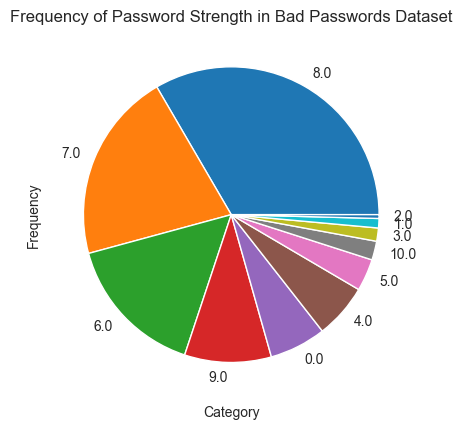

In [111]:
df_pswd["strength"].value_counts().plot.pie()
plt.title("Frequency of Password Strength in Bad Passwords Dataset")
plt.xlabel("Category")
plt.ylabel("Frequency")

# Key Statistics from Password Classifier Dataset:

In [112]:
df_pswd_2[["no_of_numeric","no_of_special_c","no_of_char","password_length","strength_bin"]].describe(include="all")

no_of_numeric  no_of_special_c     no_of_char  password_length  \
count   100000.00000    100000.000000  100000.000000    100000.000000   
mean         3.18047         0.046060       6.749010         9.975540   
std          1.99945         0.334215       3.090743         2.766384   
min          0.00000         0.000000       0.000000         1.000000   
25%          2.00000         0.000000       5.000000         8.000000   
50%          3.00000         0.000000       6.000000         9.000000   
75%          4.00000         0.000000       8.000000        11.000000   
max         22.00000        13.000000      32.000000        45.000000   

        strength_bin  
count  100000.000000  
mean        0.988660  
std         0.507044  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         2.000000

# Key Statistics from Merged Classifier Datasets:
* When combined, the most common password type was coincidentally "password".
* The bad passwords in this dataset were classified as a password strength of medium.
* Average length of password in this merged dataset is roughly ten characters.
* Many people like to use less of special characters (!@#$%^&*) 

In [113]:
df_pswd_merged.describe(include="all")

password  no_of_numeric  no_of_special_c     no_of_char  \
count     100485  100485.000000    100485.000000  100485.000000   
unique    100485            NaN              NaN            NaN   
top     password            NaN              NaN            NaN   
freq           1            NaN              NaN            NaN   
mean         NaN       3.167358         0.045838       6.744031   
std          NaN       2.006633         0.333423       3.087071   
min          NaN       0.000000         0.000000       0.000000   
25%          NaN       2.000000         0.000000       5.000000   
50%          NaN       3.000000         0.000000       6.000000   
75%          NaN       4.000000         0.000000       8.000000   
max          NaN      22.000000        13.000000      32.000000   

        password_length   strength_bin  Character_occurence  
count     100485.000000  100485.000000        100485.000000  
unique              NaN            NaN                  NaN  
top                 NaN            NaN                  NaN  
freq                NaN            NaN                  NaN  
mean           9.957227       0.990446             1.900194  
std            2.773161       0.508426             0.730587  
min            1.000000       0.000000             1.000000  
25%            8.000000       1.000000             1.000000  
50%            9.000000       1.000000             2.000000  
75%           11.000000       1.000000             2.000000  
max           45.000000       2.000000            11.000000

Text(0.5, 1.0, 'Boxplot of No of Password Characters Types in Merged Dataset')

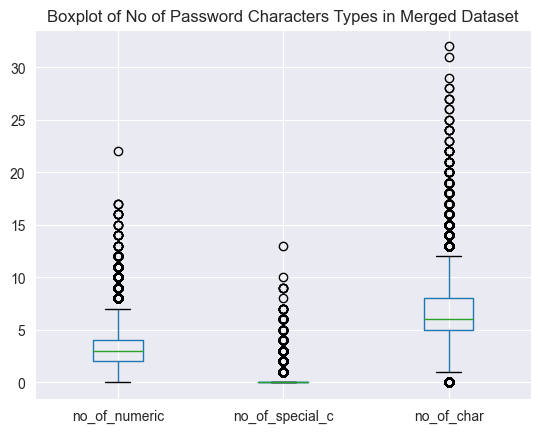

In [114]:
df_pswd_merged.boxplot(column=['no_of_numeric', 'no_of_special_c', 'no_of_char'])  
plt.title("Boxplot of No of Password Characters Types in Merged Dataset")

## Algorithm and Experiments

* We originally intended to use the following features in the "Bad Password Dataset":
    * Online Cracking Time in Minutes 
    * Offline Cracking Time in Minutes
    * Password Length
* However, we realized the accuracy of the classification was 64.4%, where the lowest recall percentage was with the level that had the strongest password strength.

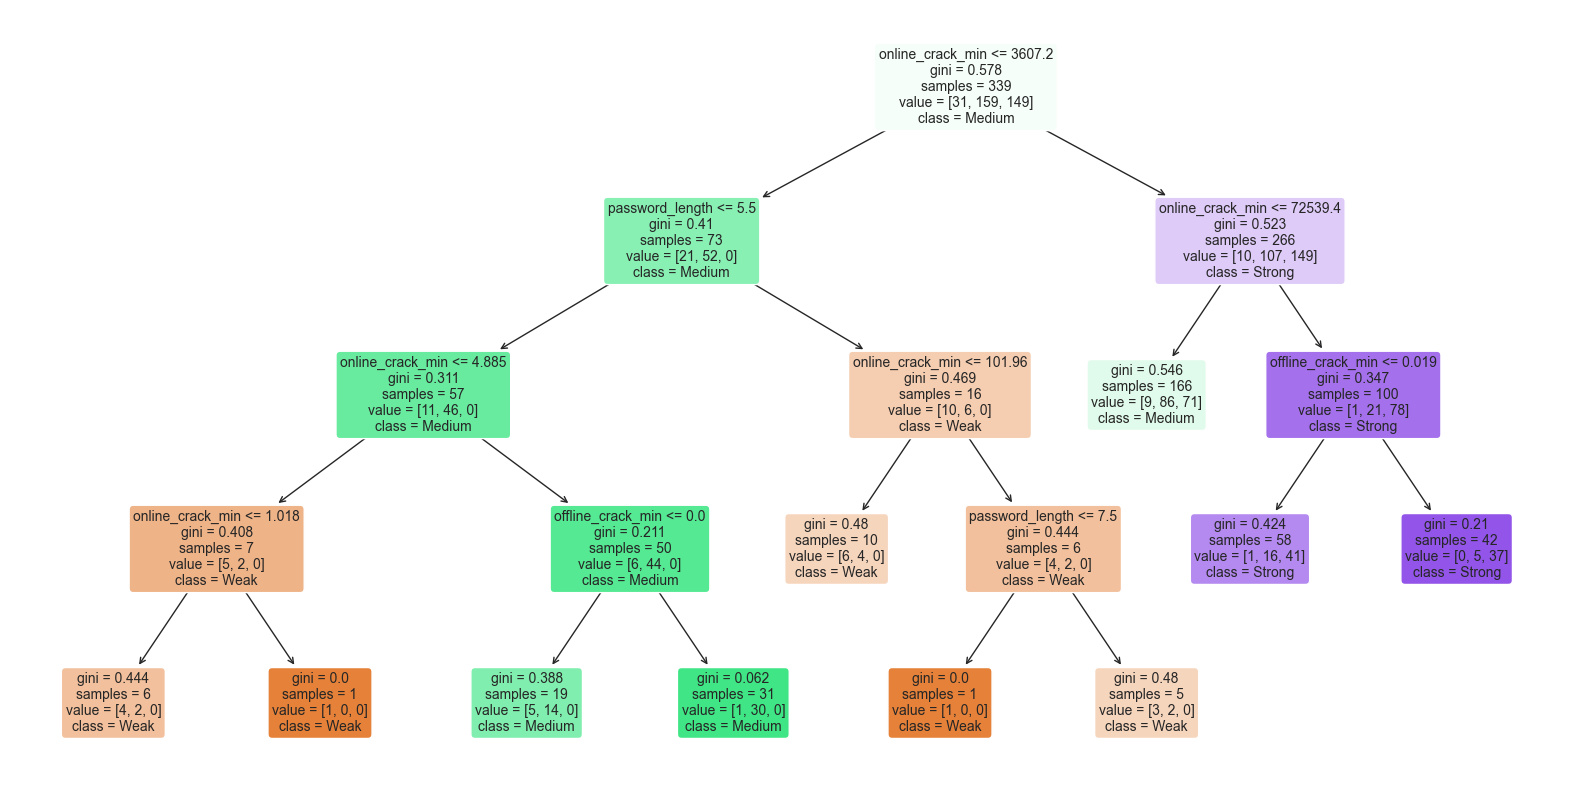

Accuracy: 0.6438356164383562
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.58      0.80      0.67        64
           2       0.79      0.49      0.61        69

    accuracy                           0.64       146
   macro avg       0.66      0.66      0.64       146
weighted avg       0.68      0.64      0.64       146

Confusion Matrix:
[[ 9  3  1]
 [ 5 51  8]
 [ 1 34 34]]


In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

X = df_pswd[['online_crack_min', 'offline_crack_min', 'password_length']]
label = df_pswd['strength_bin']  


X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(20,10)) 
plot_tree(clf, 
          feature_names=X.columns,  # This should be the names of your features
          class_names=["Weak", "Medium", "Strong"],
          filled=True, rounded=True,
          fontsize=10)
plt.show()


# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


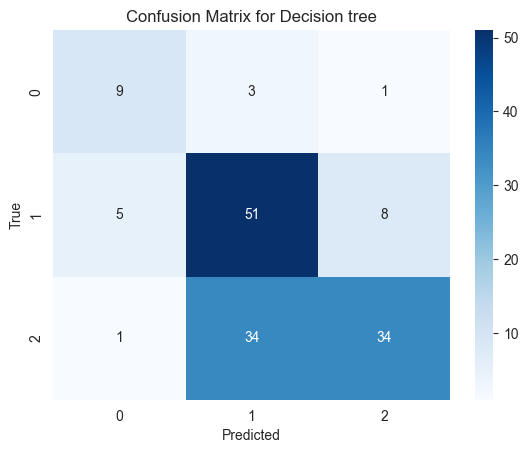

In [116]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision tree")
plt.show()

* We also tested if password category as as feature would make the classification more accurate when using the "Bad Password" Dataset. 
* When password categories were used s a feature, the accuracy decreased by six percentage points. 
    * All recalls for password strength decreased; however, the recall for weak password strength decreased significantly by twenty percentage points.

In [117]:
bad_pass_features

password             category  font_size  online_crack_min  \
0    password     password-related       11.0      3.631896e+06   
1      123456  simple-alphanumeric        8.0      1.852000e+01   
2    12345678  simple-alphanumeric        8.0      1.857600e+03   
3        1234  simple-alphanumeric        8.0      1.851667e-01   
4      qwerty  simple-alphanumeric       11.0      5.356800e+03   
..        ...                  ...        ...               ...   
494    hotrod           cool-macho       11.0      5.356800e+03   
495    reddog           cool-macho       10.0      5.356800e+03   
496  alexande                 name       12.0      3.631896e+06   
497   college            nerdy-pop       11.0      1.397220e+05   
498    jester                 name       11.0      5.356800e+03   

     offline_crack_min  no_of_numeric  no_of_special_c  no_of_char  \
0         3.616667e-02              0                0           8   
1         1.850000e-07              6                0           0   
2         1.850000e-05              8                0           0   
3         1.850000e-09              4                0           0   
4         5.350000e-05              0                0           6   
..                 ...            ...              ...         ...   
494       5.350000e-05              0                0           6   
495       5.350000e-05              0                0           6   
496       3.616667e-02              0                0           8   
497       1.391667e-03              0                0           7   
498       5.350000e-05              0                0           6   

     password_length  password-related  simple_alphamuric  animal  sport  \
0                  8                 1                  0       0      0   
1                  6                 0                  1       0      0   
2                  8                 0                  1       0      0   
3                  4                 0                  1       0      0   
4                  6                 0                  1       0      0   
..               ...               ...                ...     ...    ...   
494                6                 0                  0       0      0   
495                6                 0                  0       0      0   
496                8                 0                  0       0      0   
497                7                 0                  0       0      0   
498                6                 0                  0       0      0   

     cool_macho  name  fluffy  food  nerdy_pop  rebellious_rude  
0             0     0       0     0          0                0  
1             0     0       0     0          0                0  
2             0     0       0     0          0                0  
3             0     0       0     0          0                0  
4             0     0       0     0          0                0  
..          ...   ...     ...   ...        ...              ...  
494           1     0       0     0          0                0  
495           1     0       0     0          0                0  
496           0     1       0     0          0                0  
497           0     0       0     0          1                0  
498           0     1       0     0          0                0  

[485 rows x 19 columns]

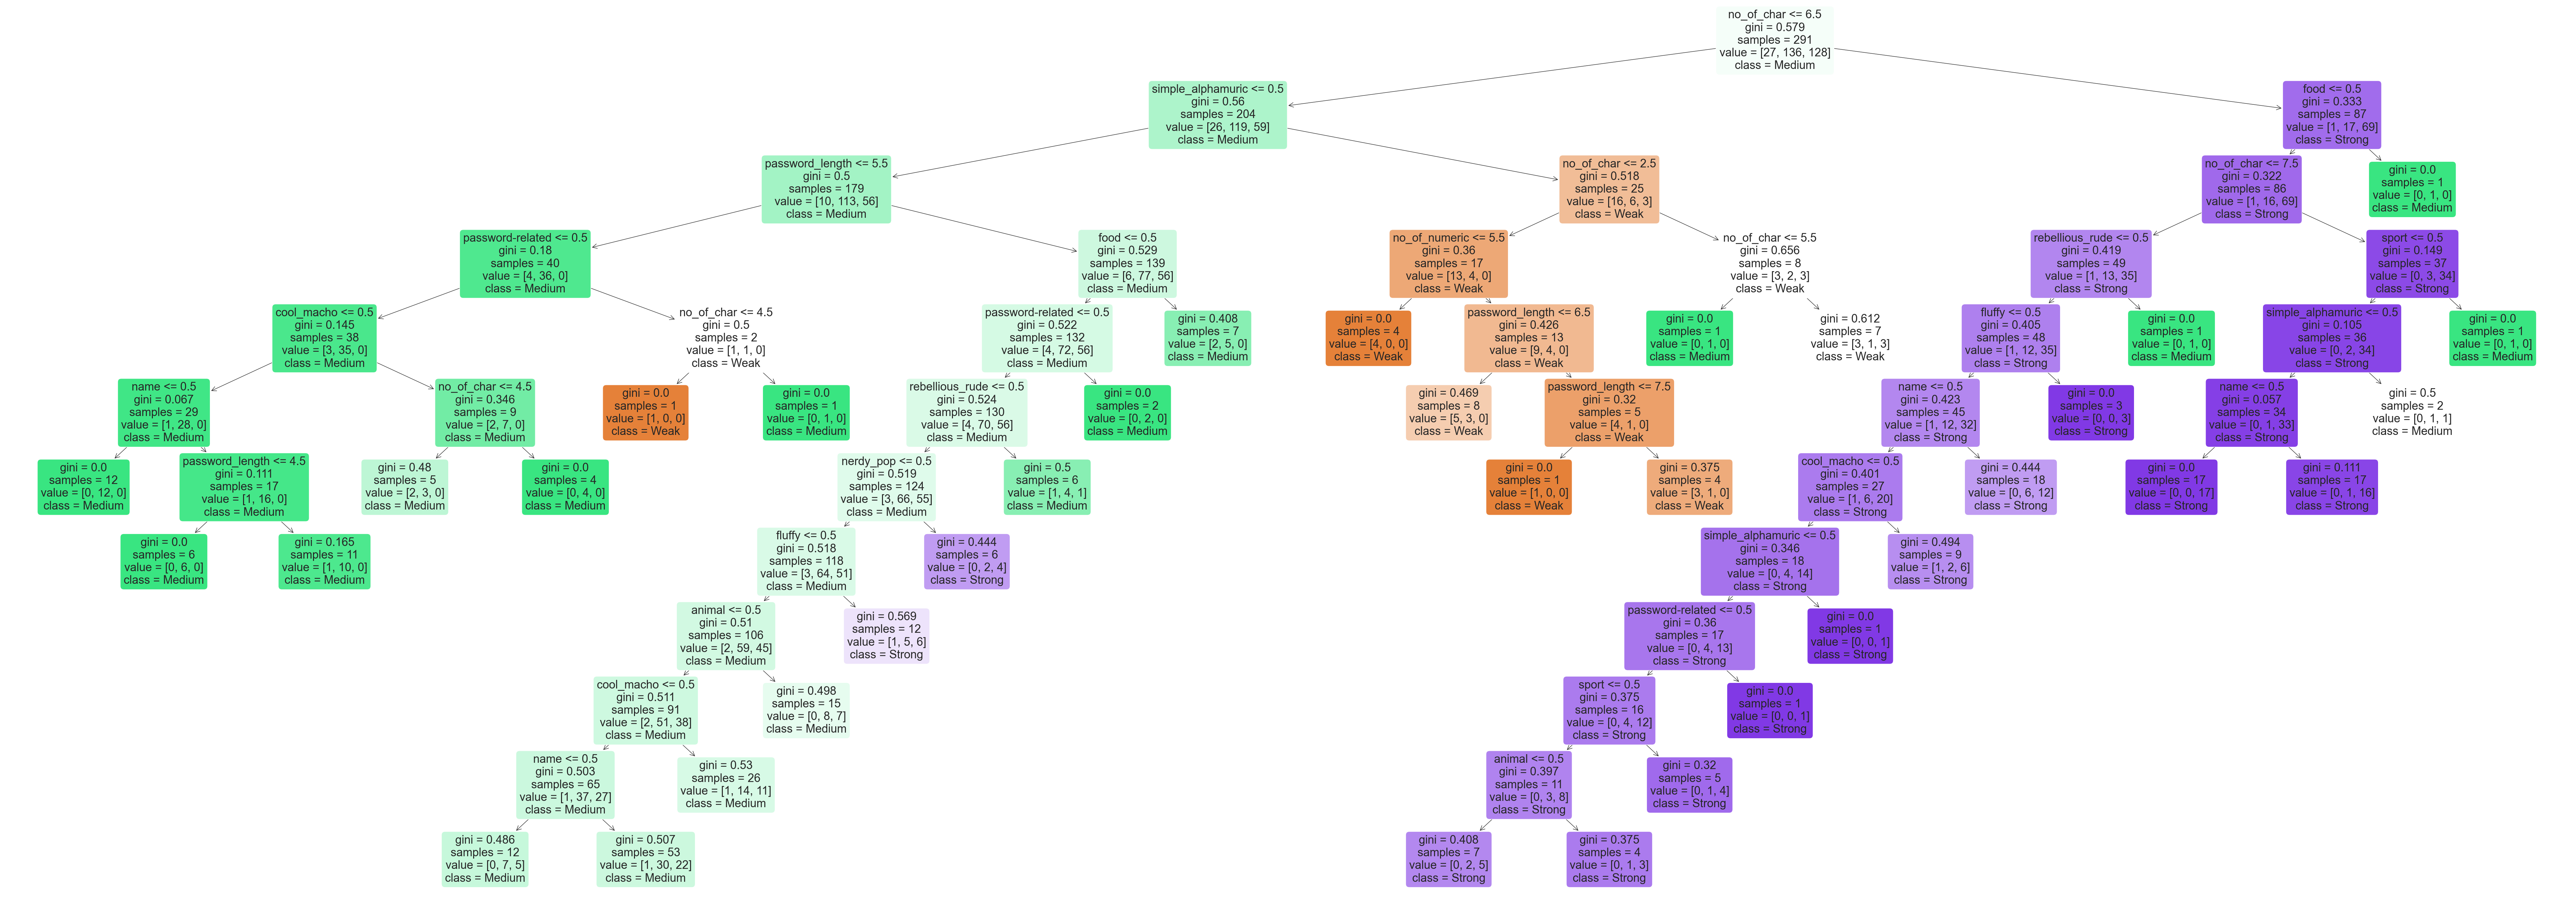

Accuracy: 0.6082474226804123
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.65      0.55        17
           1       0.56      0.68      0.61        87
           2       0.74      0.53      0.62        90

    accuracy                           0.61       194
   macro avg       0.59      0.62      0.59       194
weighted avg       0.63      0.61      0.61       194


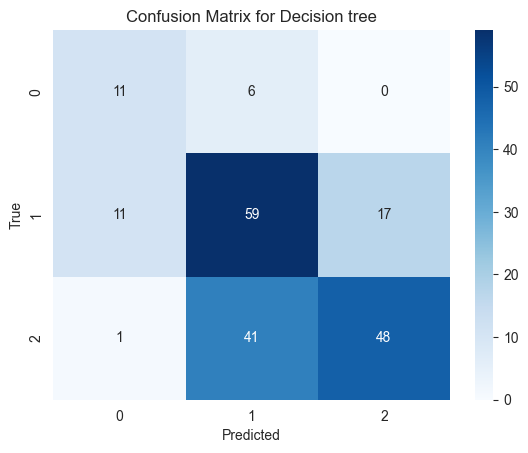

In [118]:
X_new = bad_pass_features.drop(columns= ['password', 'category', 'online_crack_min', 'offline_crack_min', 'font_size'], axis =1)
label_new = df_pswd['strength_bin']  

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new, label_new, test_size=0.4, random_state=42)

clf_new = DecisionTreeClassifier()

clf_new.fit(X_train_2, y_train_2)

y_pred_2 = clf_new.predict(X_test_2)

plt.figure(figsize=(100,35)) 
plot_tree(clf_new, 
          feature_names= X_new.columns,  
          class_names=["Weak", "Medium", "Strong"],
          filled=True, rounded=True,
          fontsize=25)
plt.show()

#Evaluating the model
print(f"Accuracy: {accuracy_score(y_test_2, y_pred_2)}")
print(f"Classification Report:\n{classification_report(y_test_2, y_pred_2)}")


confusionmatrix = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision tree")
plt.show()


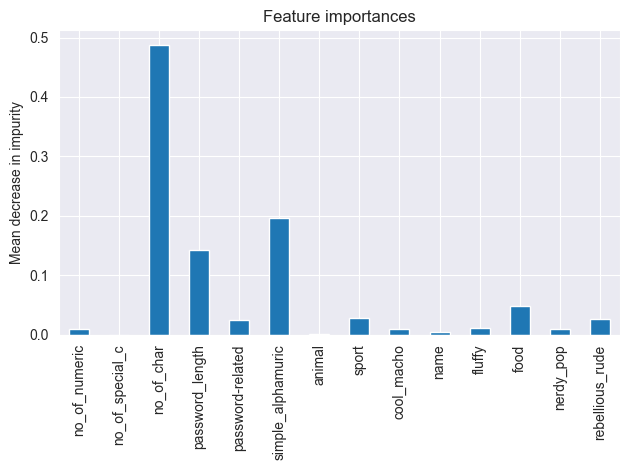

In [119]:
y =clf_new.feature_importances_
x = X_new.columns
tree_importances = pd.Series(y, index=x)
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

* However, when using the merged dataset that combined both password classifiers and bad passwords, we recieved more accurate results. 

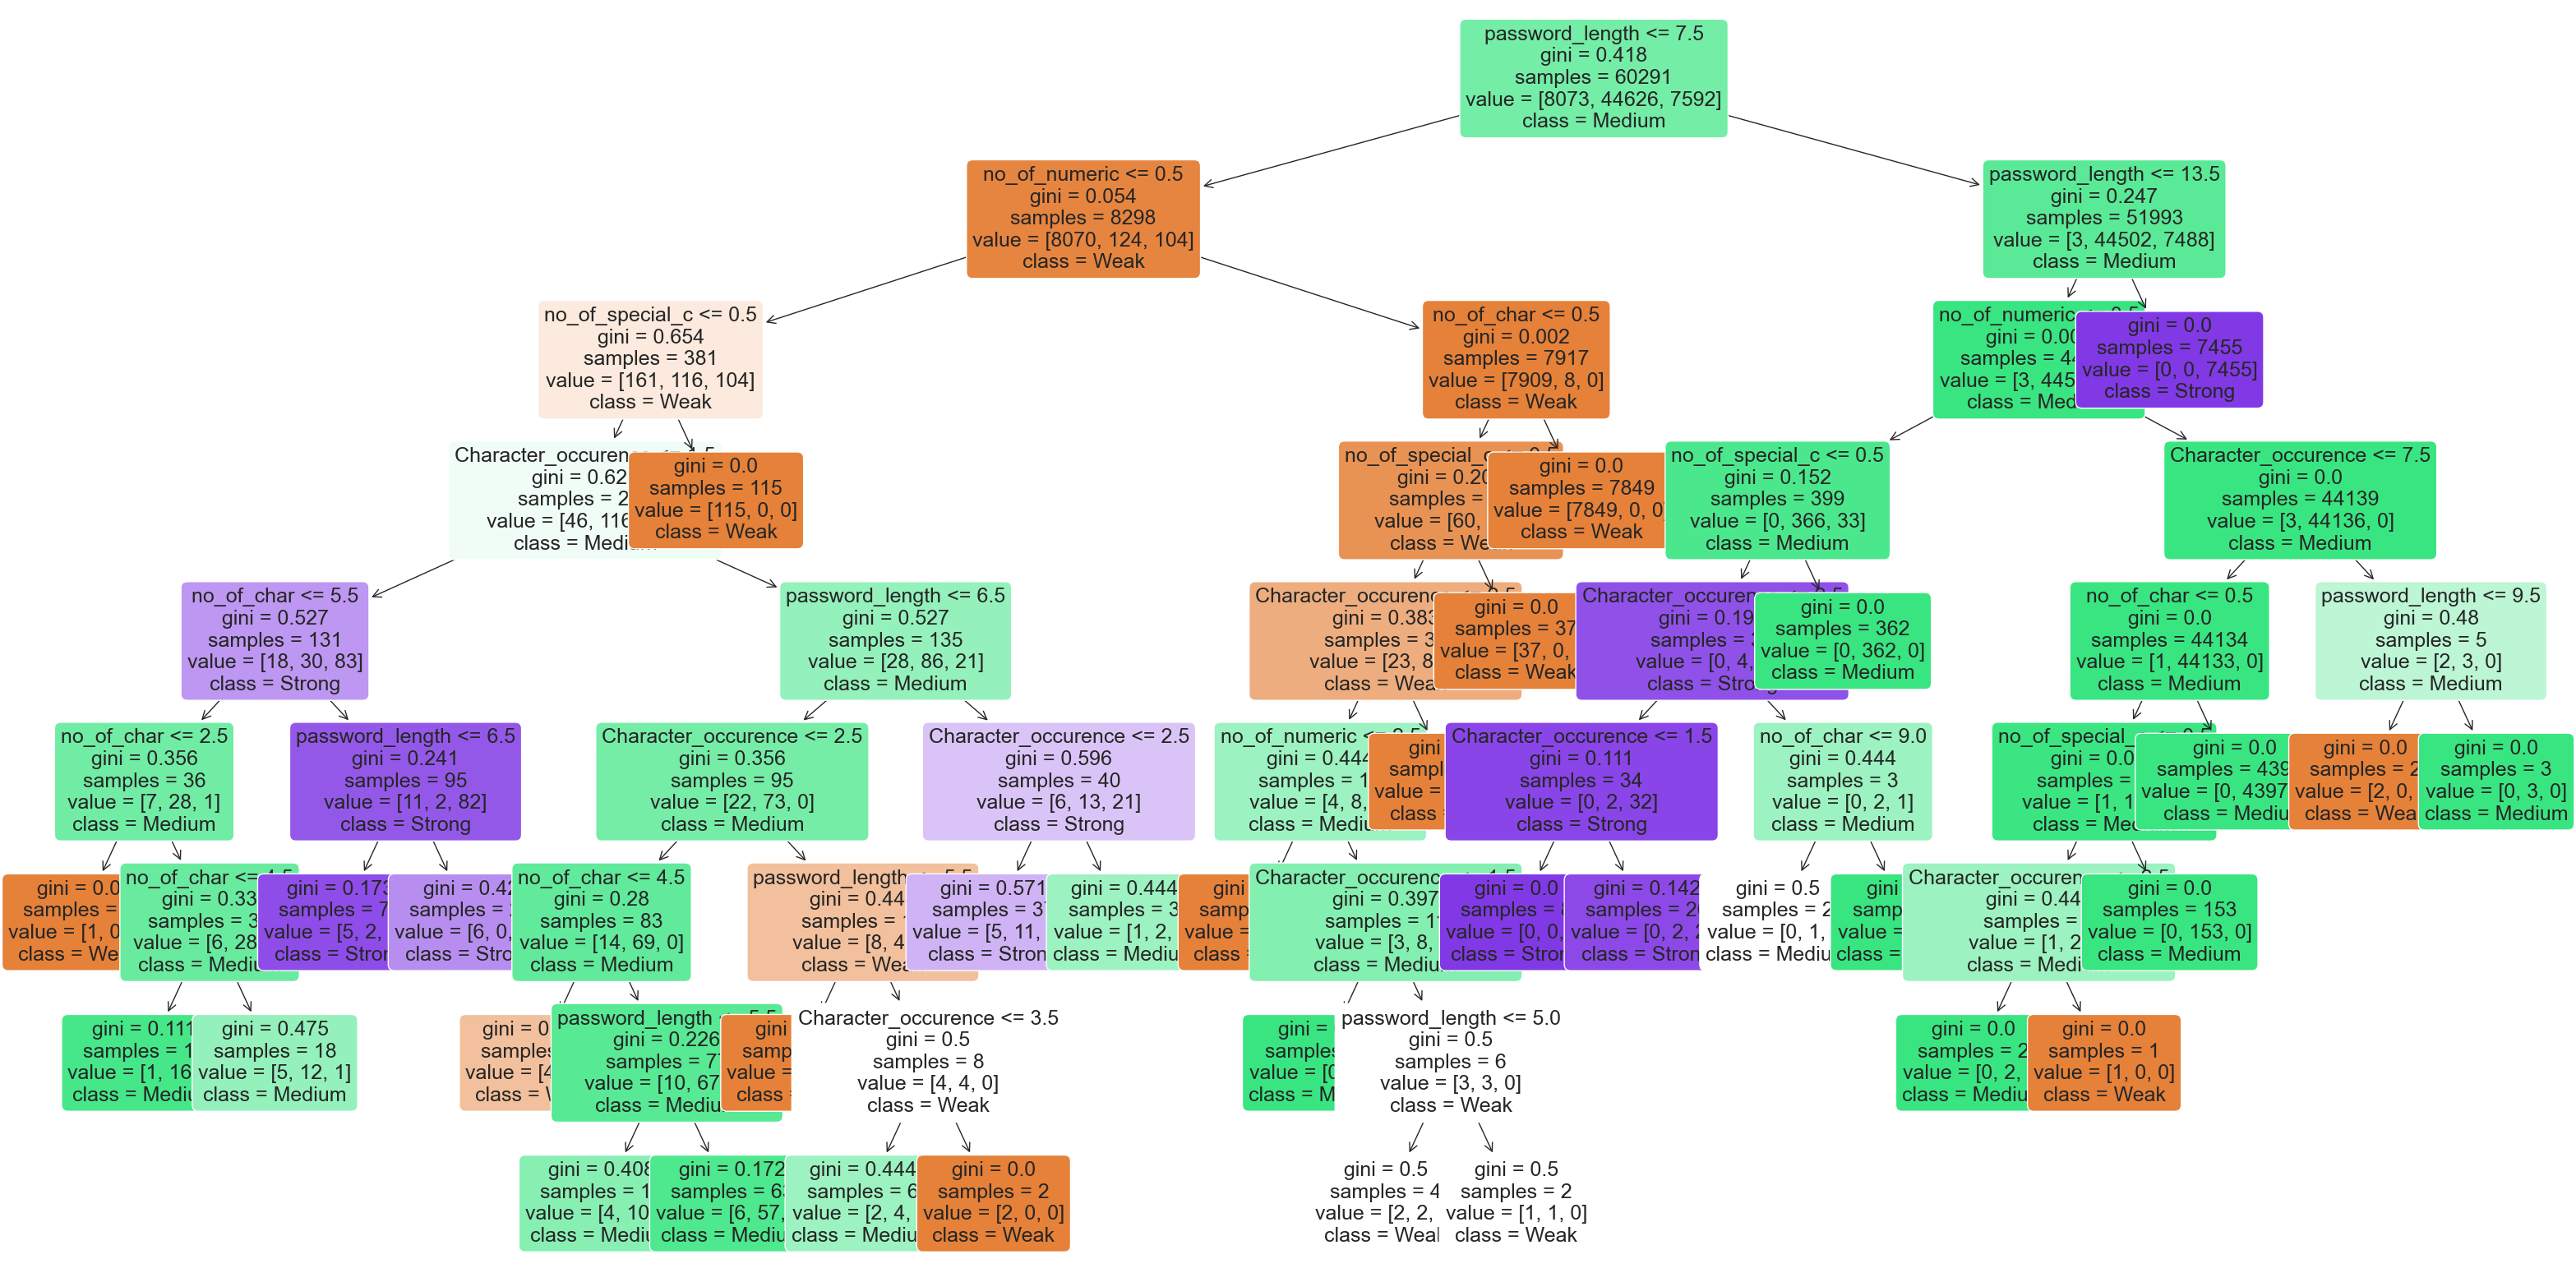

Accuracy: 0.9992038612728268
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5399
           1       1.00      1.00      1.00     29875
           2       1.00      1.00      1.00      4920

    accuracy                           1.00     40194
   macro avg       1.00      1.00      1.00     40194
weighted avg       1.00      1.00      1.00     40194


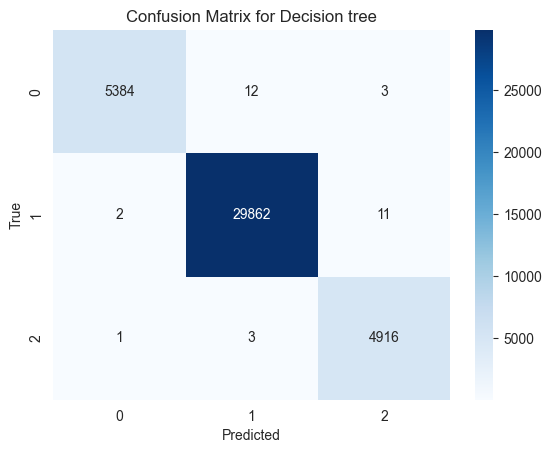

Amount of Nodes in Decision Tree: 65


In [123]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(merged_features, merged_labels, test_size=0.4, random_state=42)

clf_merged = DecisionTreeClassifier(min_weight_fraction_leaf= 0.0 )
clf_merged.fit(X_train_3, y_train_3)

y_pred_merged = clf_merged.predict(X_test_3)

plt.figure(figsize=(40,20)) 
plot_tree(clf_merged, 
          feature_names= merged_features.columns,  
          class_names=["Weak", "Medium", "Strong"],
          filled=True, rounded=True,
          fontsize=18,)
plt.show()

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test_3, y_pred_merged)}")
print(f"Classification Report:\n{classification_report(y_test_3, y_pred_merged)}")


merged_confusion_matrix = confusion_matrix(y_test_3, y_pred_merged)
sns.heatmap(merged_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision tree")
plt.show()


nodes = clf_merged.tree_
print("Amount of Nodes in Decision Tree:",nodes.node_count)

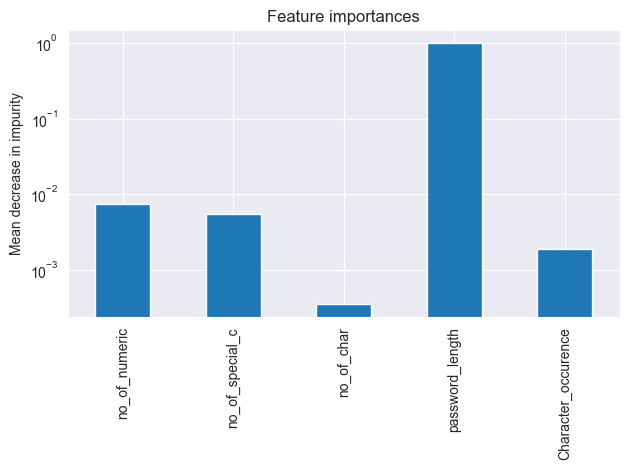

In [121]:
y =clf_merged.feature_importances_
x = merged_features.columns
tree_importances = pd.Series(y, index=x)
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
plt.yscale("log")
fig.tight_layout()

## Challenges
* Most challenging part of this project was cleaning the dataset.
    * Though most of the "Bad Password (Never Use Them)" dataset was relatively clean, some feature categories needed standardization or relative cleaning in terms of missing values. 
* Feature "Font Size" was highly influential in categorizing bad passwords, which is something we never thought would categorize these bad passwords.

## Next Steps
* Instead of only using bad passwords, try and categorize all types of passwords in order to see if there is any other types of classifications. 